In [2]:
import matplotlib.pyplot as plt
import numpy as np
import string
import cv2 as cv


[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]
[[1.        0.        0.       ]
 [0.        1.        0.       ]
 [0.        0.        0.8660254]]
[[0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [1. 1. 1. 1.]]
[[0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1.]]
[[0.         0.         1.15470054 1.15470054 0.        ]
 [0.         1.15470054 1.15470054 0.         0.        ]
 [1.         1.         1.         1.         1.        ]]


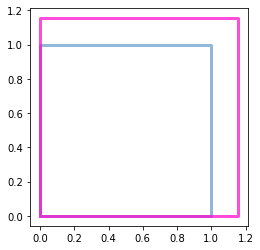

In [53]:
# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)
# matrix with row vectors of points
P = np.array([a, b, c, d]).T
print(P)
t = np.pi/3
H = np.identity(3)
#H[0,0] = 2 #changes the width (size in x-direction)
#H[0,1] = np.cos(t) #changes the angle of vertical lines
#H[0,2] = np.sin(t) #translation in x-direction 
#H[1,0] = -np.cos(t) #changes the angle of the horizontal lines
#H[1,1] = 2 #changes the height (size in y-direction)
#H[1,2] = np.sin(t) #translation in y-direction 
#H[2, 0] = 0.3 #changes the parallelism between horizontal lines
#H[2, 1] = 0.5 #changes the parallelism between horizontal lines
H[2,2] = np.sin(t) #zooming property
#H = [[np.sin(t), np.cos(t), 0.], [np.cos(t), -np.sin(t), 0.], [0., 0., 1.]]
#H = [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]]
#H = [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]]
print(H)
Pt = np.matmul(H, P)
P = P/P[-1, :]
#print(P[-1, :])
print(P)
P = np.insert(P,4,P[:,0],axis=1)
print(P)
x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
print(Pt)
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
ax.plot(xt, yt, color='#ff00cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

In [7]:
def img_to_array(img):
    r, c, ch = img.shape
    im_array = np.zeros((c,r, ch), dtype= img.dtype)
    for i in range(r):
        im_array[:,i] = img[i]
    return im_array
def array_to_img(arr):
    r,c,ch = arr.shape
    image = np.zeros((c,r,ch) , dtype=arr.dtype)
    for i in range(c):
        image[i] = arr[:,i]
    return image
def warpperspective(img, H, size):
    r, c = size
    R, C = img.shape[0], img.shape[1]
    new_img = np.zeros((r,c, img.shape[2]), dtype=img.dtype)
    img_array = img_to_array(img)
    for i in range(r):
        for j in range(c):
            p = np.matmul( np.linalg.inv(H), np.array([i, j ,1]))
            p = p/p[2]
            i1 = int(p[0])
            j1 = int(p[1])
            if (i1 >= 0 and i1 < C) and  (j1 >= 0 and j1 < R):
                new_img[i,j] = img_array[i1, j1]
    new_img = array_to_img(new_img)
    return new_img

In [8]:

im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('../images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
with open('../images/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]

H = np.array(H)
print(H)
im5_warped = warpperspective(im5, np.linalg.inv(H), (im1.shape[1]+im5.shape[1],im1.shape[0]))
#im4_warped = cv.warpPerspective(im4, H, (im1.shape[0]+im1.shape[0],im1.shape[0]+im1.shape[0]))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()


[[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


In [6]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('../images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im4copy = im4.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)
while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)
cv.destroyAllWindows()


[[ 30.   7.]
 [993.  10.]
 [987. 640.]
 [ 27. 636.]
 [481. 282.]]
[[  4.   5.]
 [991.   8.]
 [990. 640.]
 [ 10. 641.]
 [507. 280.]]


[[688. 118.]
 [622. 450.]
 [333. 192.]
 [172.  47.]
 [123. 497.]]
[[492. 198.]
 [495. 496.]
 [381. 235.]
 [308.  65.]
 [313. 553.]]
[[ 1.71719746e+00 -7.97226379e-02 -3.92426586e+02]
 [-3.44073645e-01  7.68657517e-01  9.15269687e+01]
 [-7.94213736e-04  1.30916653e-04  1.00000000e+00]]


(-0.5, 1599.5, 639.5, -0.5)

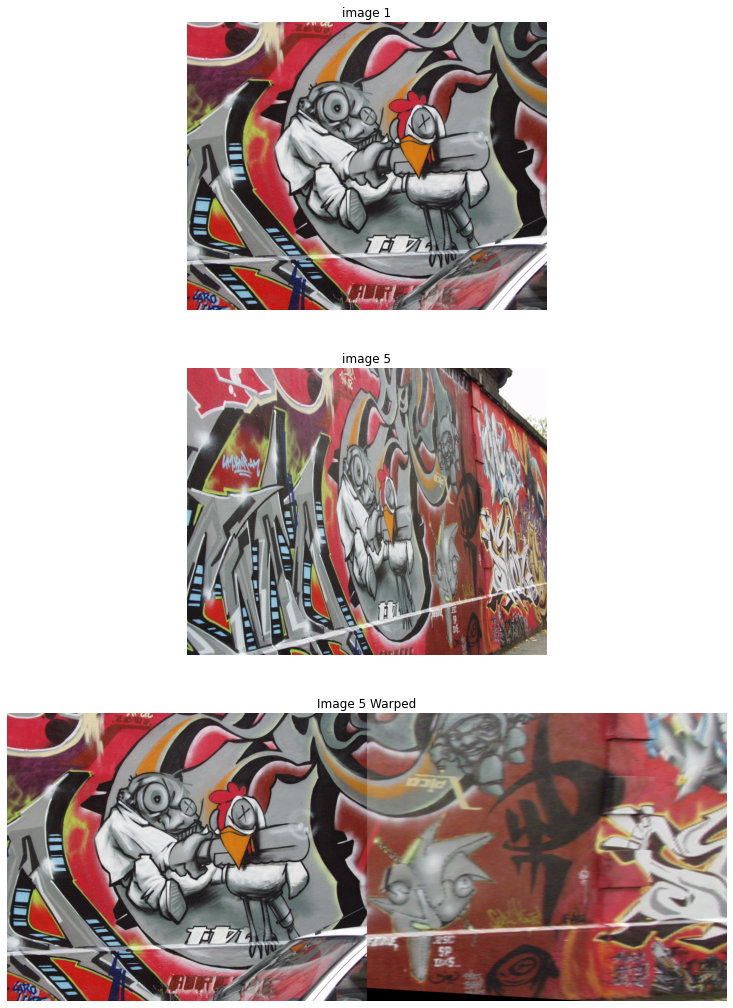

In [3]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('../images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im5copy = im5.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)
while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)
H, status = cv.findHomography(p2, p1,cv.RANSAC)
print(H)
im5_warped = cv.warpPerspective(im5,H,(im1.shape[1] + im5.shape[1], im1.shape[0]))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.destroyAllWindows()

fig,(ax1,ax2,ax3) = plt.subplots(3,1 , figsize=(18,18))
ax1.imshow(cv.cvtColor(im1,  cv . COLOR_BGR2RGB))
ax1.set_title("image 1");ax1.axis("off")
ax2.imshow(cv.cvtColor(im5,  cv . COLOR_BGR2RGB))
ax2.set_title("image 5");ax2.axis("off")
ax3.imshow(cv.cvtColor(im5_warped,  cv . COLOR_BGR2RGB))
ax3.set_title("Image 5 Warped");ax3.axis("off")

In [19]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('../images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im4copy = im4.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)
while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)
A = np.empty((2*N, 9))
cv.destroyAllWindows()


[[280. 287.]
 [682.  56.]
 [746. 447.]
 [514. 344.]
 [ 34. 348.]]
[[289. 351.]
 [357.  83.]
 [587. 365.]
 [451. 337.]
 [223. 473.]]


In [1]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
        
im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('../images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im4copy = im4.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)
H = []
for i in range(0, len(p1)):
    x, y = p1[i][0], p1[i][1]
    u, v = p2[i][0], p2[i][1]
    H.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
    H.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
H = np.asarray(H)
U, S, Vh = np.linalg.svd(H)
L = Vh[-1,:] / Vh[-1,-1]
H = L.reshape(3, 3)
print(H)

im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (im1.shape[1]+im4.shape[1],im1.shape[0]))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.destroyAllWindows()

fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize=(18,18) )
ax1.imshow(cv.cvtColor(im1,  cv . COLOR_BGR2RGB))
ax1.set_title("image 1")
ax1.axis("off")
ax2.imshow(cv.cvtColor(im4,  cv . COLOR_BGR2RGB))
ax2.set_title("image 4")
ax2.axis("off")
ax3.imshow(cv.cvtColor(im4_warped,  cv . COLOR_BGR2RGB))
ax3.set_title("Image 4 Warped")
ax3.axis("off")

NameError: name 'np' is not defined

In [6]:
!git clone https://github.com/magicleap/SuperGluePretainedNetwork.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from pathlib import Path
import argparse
import random
import numpy as np
import matplotlib.cm as cm
import torch
import easydict


from models.matching import Matching
from models.utils import (compute_pose_error, compute_epipolar_error,
                          estimate_pose, make_matching_plot,
                          error_colormap, AverageTimer, pose_auc, read_image,
                          rotate_intrinsics, rotate_pose_inplane,
                          scale_intrinsics)

torch.set_grad_enabled(False)


if __name__ == '__main__':
    opt = easydict.EasyDict({
        'input_pairs': 'assets/graf_find_pair.txt',
        "input_dir" : 'assets/graf_find/',
        'output_dir':'dump_match_pairs/',
        'max_length':-1,
        'resize':[-1],
        'resize_float':False,
        'superglue':'indoor',
        'max_keypoints':1024,
        'keypoint_threshold':0.005,
        'nms_radius':4,
        'sinkhorn_iterations':20,
        'match_threshold':0.2,
        'viz' :True,
        'eval':False,
        'fast_viz' : False,
        'cache':False,
        'show_keypoints':True,
        'viz_extension':'png',
        'opencv_display':False,
        'shuffle':False,
        'force_cpu':True,

    })
#    parser = argparse.ArgumentParser(
#        description='Image pair matching and pose evaluation with SuperGlue',
#        formatter_class=argparse.ArgumentDefaultsHelpFormatter)

#    parser.add_argument(
#        '--input_pairs', type=str, default='assets/scannet_sample_pairs_with_gt.txt',
#        help='Path to the list of image pairs')
#    parser.add_argument(
#        '--input_dir', type=str, default='assets/scannet_sample_images/',
#        help='Path to the directory that contains the images')
#    parser.add_argument(
#        '--output_dir', type=str, default='dump_match_pairs/',
#        help='Path to the directory in which the .npz results and optionally,'
#             'the visualization images are written')

#    parser.add_argument(
#        '--max_length', type=int, default=-1,
#        help='Maximum number of pairs to evaluate')
#    parser.add_argument(
#        '--resize', type=int, nargs='+', default=[640, 480],
#        help='Resize the input image before running inference. If two numbers, '
#             'resize to the exact dimensions, if one number, resize the max '
#            'dimension, if -1, do not resize')
#    parser.add_argument(
#        '--resize_float', action='store_true',
#        help='Resize the image after casting uint8 to float')

#    parser.add_argument(
#        '--superglue', choices={'indoor', 'outdoor'}, default='indoor',
#        help='SuperGlue weights')
#    parser.add_argument(
#        '--max_keypoints', type=int, default=1024,
#        help='Maximum number of keypoints detected by Superpoint'
#             ' (\'-1\' keeps all keypoints)')
#    parser.add_argument(
#        '--keypoint_threshold', type=float, default=0.005,
#        help='SuperPoint keypoint detector confidence threshold')
#    parser.add_argument(
#        '--nms_radius', type=int, default=4,
#        help='SuperPoint Non Maximum Suppression (NMS) radius'
#        ' (Must be positive)')
#    parser.add_argument(
#        '--sinkhorn_iterations', type=int, default=20,
#        help='Number of Sinkhorn iterations performed by SuperGlue')
#    parser.add_argument(
#        '--match_threshold', type=float, default=0.2,
#        help='SuperGlue match threshold')

#    parser.add_argument(
#        '--viz', action='store_true',
#        help='Visualize the matches and dump the plots')
#    parser.add_argument(
#        '--eval', action='store_true',
#        help='Perform the evaluation'
#            ' (requires ground truth pose and intrinsics)')
#    parser.add_argument(
#        '--fast_viz', action='store_true',
#        help='Use faster image visualization with OpenCV instead of Matplotlib')
#    parser.add_argument(
#        '--cache', action='store_true',
#        help='Skip the pair if output .npz files are already found')
#    parser.add_argument(
#        '--show_keypoints', action='store_true',
#       help='Plot the keypoints in addition to the matches')
#    parser.add_argument(
#        '--viz_extension', type=str, default='png', choices=['png', 'pdf'],
#       help='Visualization file extension. Use pdf for highest-quality.')
#    parser.add_argument(
#       '--opencv_display', action='store_true',
#        help='Visualize via OpenCV before saving output images')
#    parser.add_argument(
#        '--shuffle', action='store_true',
#        help='Shuffle ordering of pairs before processing')
#    parser.add_argument(
#        '--force_cpu', action='store_true',
#       help='Force pytorch to run in CPU mode.')

#    opt = parser.parse_args()
    print(opt)

    assert not (opt.opencv_display and not opt.viz), 'Must use --viz with --opencv_display'
    assert not (opt.opencv_display and not opt.fast_viz), 'Cannot use --opencv_display without --fast_viz'
    assert not (opt.fast_viz and not opt.viz), 'Must use --viz with --fast_viz'
    assert not (opt.fast_viz and opt.viz_extension == 'pdf'), 'Cannot use pdf extension with --fast_viz'

    if len(opt.resize) == 2 and opt.resize[1] == -1:
        opt.resize = opt.resize[0:1]
    if len(opt.resize) == 2:
        print('Will resize to {}x{} (WxH)'.format(
            opt.resize[0], opt.resize[1]))
    elif len(opt.resize) == 1 and opt.resize[0] > 0:
        print('Will resize max dimension to {}'.format(opt.resize[0]))
    elif len(opt.resize) == 1:
        print('Will not resize images')
    else:
        raise ValueError('Cannot specify more than two integers for --resize')

    with open(opt.input_pairs, 'r') as f:
        pairs = [l.split() for l in f.readlines()]

    if opt.max_length > -1:
        pairs = pairs[0:np.min([len(pairs), opt.max_length])]

    if opt.shuffle:
        random.Random(0).shuffle(pairs)

    if opt.eval:
        if not all([len(p) == 38 for p in pairs]):
            raise ValueError(
                'All pairs should have ground truth info for evaluation.'
                'File \"{}\" needs 38 valid entries per row'.format(opt.input_pairs))

    # Load the SuperPoint and SuperGlue models.
    device = 'cuda' if torch.cuda.is_available() and not opt.force_cpu else 'cpu'
    print('Running inference on device \"{}\"'.format(device))
    config = {
        'superpoint': {
            'nms_radius': opt.nms_radius,
            'keypoint_threshold': opt.keypoint_threshold,
            'max_keypoints': opt.max_keypoints
        },
        'superglue': {
            'weights': opt.superglue,
            'sinkhorn_iterations': opt.sinkhorn_iterations,
            'match_threshold': opt.match_threshold,
        }
    }
    matching = Matching(config).eval().to(device)

    # Create the output directories if they do not exist already.
    input_dir = Path(opt.input_dir)
    print('Looking for data in directory \"{}\"'.format(input_dir))
    output_dir = Path(opt.output_dir)
    output_dir.mkdir(exist_ok=True, parents=True)
    print('Will write matches to directory \"{}\"'.format(output_dir))
    if opt.eval:
        print('Will write evaluation results',
              'to directory \"{}\"'.format(output_dir))
    if opt.viz:
        print('Will write visualization images to',
              'directory \"{}\"'.format(output_dir))

    timer = AverageTimer(newline=True)
    for i, pair in enumerate(pairs):
        name0, name1 = pair[:2]
        stem0, stem1 = Path(name0).stem, Path(name1).stem
        matches_path = output_dir / '{}_{}_matches.npz'.format(stem0, stem1)
        eval_path = output_dir / '{}_{}_evaluation.npz'.format(stem0, stem1)
        viz_path = output_dir / '{}_{}_matches.{}'.format(stem0, stem1, opt.viz_extension)
        viz_eval_path = output_dir / \
            '{}_{}_evaluation.{}'.format(stem0, stem1, opt.viz_extension)

        # Handle --cache logic.
        do_match = True
        do_eval = opt.eval
        do_viz = opt.viz
        do_viz_eval = opt.eval and opt.viz
        if opt.cache:
            if matches_path.exists():
                try:
                    results = np.load(matches_path)
                except:
                    raise IOError('Cannot load matches .npz file: %s' %
                                  matches_path)

                kpts0, kpts1 = results['keypoints0'], results['keypoints1']
                matches, conf = results['matches'], results['match_confidence']
                do_match = False
            if opt.eval and eval_path.exists():
                try:
                    results = np.load(eval_path)
                except:
                    raise IOError('Cannot load eval .npz file: %s' % eval_path)
                err_R, err_t = results['error_R'], results['error_t']
                precision = results['precision']
                matching_score = results['matching_score']
                num_correct = results['num_correct']
                epi_errs = results['epipolar_errors']
                do_eval = False
            if opt.viz and viz_path.exists():
                do_viz = False
            if opt.viz and opt.eval and viz_eval_path.exists():
                do_viz_eval = False
            timer.update('load_cache')

        if not (do_match or do_eval or do_viz or do_viz_eval):
            timer.print('Finished pair {:5} of {:5}'.format(i, len(pairs)))
            continue

        # If a rotation integer is provided (e.g. from EXIF data), use it:
        if len(pair) >= 5:
            rot0, rot1 = int(pair[2]), int(pair[3])
        else:
            rot0, rot1 = 0, 0

        # Load the image pair.
        image0, inp0, scales0 = read_image(
           input_dir  / name0, device, opt.resize, rot0, opt.resize_float)
        image1, inp1, scales1 = read_image(
           input_dir  / name1, device, opt.resize, rot1, opt.resize_float)
        if image0 is None or image1 is None:
            print('Problem reading image pair: {} {}'.format(
                input_dir/name0, input_dir/name1))
            exit(1)
        timer.update('load_image')

        if do_match:
            # Perform the matching.
            pred = matching({'image0': inp0, 'image1': inp1})
            pred = {k: v[0].cpu().numpy() for k, v in pred.items()}
            kpts0, kpts1 = pred['keypoints0'], pred['keypoints1']
            matches, conf = pred['matches0'], pred['matching_scores0']
            timer.update('matcher')

            # Write the matches to disk.
            out_matches = {'keypoints0': kpts0, 'keypoints1': kpts1,
                           'matches': matches, 'match_confidence': conf}
            np.savez(str(matches_path), **out_matches)

        # Keep the matching keypoints.
        valid = matches > -1
        mkpts0 = kpts0[valid]
        mkpts1 = kpts1[matches[valid]]
        mconf = conf[valid]

        if do_eval:
            # Estimate the pose and compute the pose error.
            assert len(pair) == 38, 'Pair does not have ground truth info'
            K0 = np.array(pair[4:13]).astype(float).reshape(3, 3)
            K1 = np.array(pair[13:22]).astype(float).reshape(3, 3)
            T_0to1 = np.array(pair[22:]).astype(float).reshape(4, 4)

            # Scale the intrinsics to resized image.
            K0 = scale_intrinsics(K0, scales0)
            K1 = scale_intrinsics(K1, scales1)

            # Update the intrinsics + extrinsics if EXIF rotation was found.
            if rot0 != 0 or rot1 != 0:
                cam0_T_w = np.eye(4)
                cam1_T_w = T_0to1
                if rot0 != 0:
                    K0 = rotate_intrinsics(K0, image0.shape, rot0)
                    cam0_T_w = rotate_pose_inplane(cam0_T_w, rot0)
                if rot1 != 0:
                    K1 = rotate_intrinsics(K1, image1.shape, rot1)
                    cam1_T_w = rotate_pose_inplane(cam1_T_w, rot1)
                cam1_T_cam0 = cam1_T_w @ np.linalg.inv(cam0_T_w)
                T_0to1 = cam1_T_cam0

            epi_errs = compute_epipolar_error(mkpts0, mkpts1, T_0to1, K0, K1)
            correct = epi_errs < 5e-4
            num_correct = np.sum(correct)
            precision = np.mean(correct) if len(correct) > 0 else 0
            matching_score = num_correct / len(kpts0) if len(kpts0) > 0 else 0

            thresh = 1.  # In pixels relative to resized image size.
            ret = estimate_pose(mkpts0, mkpts1, K0, K1, thresh)
            if ret is None:
                err_t, err_R = np.inf, np.inf
            else:
                R, t, inliers = ret
                err_t, err_R = compute_pose_error(T_0to1, R, t)

            # Write the evaluation results to disk.
            out_eval = {'error_t': err_t,
                        'error_R': err_R,
                        'precision': precision,
                        'matching_score': matching_score,
                        'num_correct': num_correct,
                        'epipolar_errors': epi_errs}
            np.savez(str(eval_path), **out_eval)
            timer.update('eval')

        if do_viz:
            # Visualize the matches.
            color = cm.jet(mconf)
            text = [
                'SuperGlue',
                'Keypoints: {}:{}'.format(len(kpts0), len(kpts1)),
                'Matches: {}'.format(len(mkpts0)),
            ]
            if rot0 != 0 or rot1 != 0:
                text.append('Rotation: {}:{}'.format(rot0, rot1))

            # Display extra parameter info.
            k_thresh = matching.superpoint.config['keypoint_threshold']
            m_thresh = matching.superglue.config['match_threshold']
            small_text = [
                'Keypoint Threshold: {:.4f}'.format(k_thresh),
                'Match Threshold: {:.2f}'.format(m_thresh),
                'Image Pair: {}:{}'.format(stem0, stem1),
            ]

            make_matching_plot(
                image0, image1, kpts0, kpts1, mkpts0, mkpts1, color,
                text, viz_path, opt.show_keypoints,
                opt.fast_viz, opt.opencv_display, 'Matches', small_text)

            timer.update('viz_match')

        if do_viz_eval:
            # Visualize the evaluation results for the image pair.
            color = np.clip((epi_errs - 0) / (1e-3 - 0), 0, 1)
            color = error_colormap(1 - color)
            deg, delta = ' deg', 'Delta '
            if not opt.fast_viz:
                deg, delta = '°', '$\\Delta$'
            e_t = 'FAIL' if np.isinf(err_t) else '{:.1f}{}'.format(err_t, deg)
            e_R = 'FAIL' if np.isinf(err_R) else '{:.1f}{}'.format(err_R, deg)
            text = [
                'SuperGlue',
                '{}R: {}'.format(delta, e_R), '{}t: {}'.format(delta, e_t),
                'inliers: {}/{}'.format(num_correct, (matches > -1).sum()),
            ]
            if rot0 != 0 or rot1 != 0:
                text.append('Rotation: {}:{}'.format(rot0, rot1))

            # Display extra parameter info (only works with --fast_viz).
            k_thresh = matching.superpoint.config['keypoint_threshold']
            m_thresh = matching.superglue.config['match_threshold']
            small_text = [
                'Keypoint Threshold: {:.4f}'.format(k_thresh),
                'Match Threshold: {:.2f}'.format(m_thresh),
                'Image Pair: {}:{}'.format(stem0, stem1),
            ]

            make_matching_plot(
                image0, image1, kpts0, kpts1, mkpts0,
                mkpts1, color, text, viz_eval_path,
                opt.show_keypoints, opt.fast_viz,
                opt.opencv_display, 'Relative Pose', small_text)

            timer.update('viz_eval')

        timer.print('Finished pair {:5} of {:5}'.format(i, len(pairs)))

    if opt.eval:
        # Collate the results into a final table and print to terminal.
        pose_errors = []
        precisions = []
        matching_scores = []
        for pair in pairs:
            name0, name1 = pair[:2]
            stem0, stem1 = Path(name0).stem, Path(name1).stem
            eval_path = output_dir / \
                '{}_{}_evaluation.npz'.format(stem0, stem1)
            results = np.load(eval_path)
            pose_error = np.maximum(results['error_t'], results['error_R'])
            pose_errors.append(pose_error)
            precisions.append(results['precision'])
            matching_scores.append(results['matching_score'])
        thresholds = [5, 10, 20]
        aucs = pose_auc(pose_errors, thresholds)
        aucs = [100.*yy for yy in aucs]
        prec = 100.*np.mean(precisions)
        ms = 100.*np.mean(matching_scores)
        print('Evaluation Results (mean over {} pairs):'.format(len(pairs)))
        print('AUC@5\t AUC@10\t AUC@20\t Prec\t MScore\t')
        print('{:.2f}\t {:.2f}\t {:.2f}\t {:.2f}\t {:.2f}\t'.format(
            aucs[0], aucs[1], aucs[2], prec, ms))

In [3]:
from pathlib import Path
import argparse
import cv2
import matplotlib.cm as cm
import torch

from models.matching import Matching
from models.utils import (AverageTimer, VideoStreamer,
                          make_matching_plot_fast, frame2tensor)

torch.set_grad_enabled(False)


if __name__ == '__main__':
    parser = argparse.ArgumentParser(
        description='SuperGlue demo',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument(
        '--input', type=str, default='0',
        help='ID of a USB webcam, URL of an IP camera, '
             'or path to an image directory or movie file')
    parser.add_argument(
        '--output_dir', type=str, default=None,
        help='Directory where to write output frames (If None, no output)')

    parser.add_argument(
        '--image_glob', type=str, nargs='+', default=['*.png', '*.jpg', '*.jpeg'],
        help='Glob if a directory of images is specified')
    parser.add_argument(
        '--skip', type=int, default=1,
        help='Images to skip if input is a movie or directory')
    parser.add_argument(
        '--max_length', type=int, default=1000000,
        help='Maximum length if input is a movie or directory')
    parser.add_argument(
        '--resize', type=int, nargs='+', default=[640, 480],
        help='Resize the input image before running inference. If two numbers, '
             'resize to the exact dimensions, if one number, resize the max '
             'dimension, if -1, do not resize')

    parser.add_argument(
        '--superglue', choices={'indoor', 'outdoor'}, default='indoor',
        help='SuperGlue weights')
    parser.add_argument(
        '--max_keypoints', type=int, default=-1,
        help='Maximum number of keypoints detected by Superpoint'
             ' (\'-1\' keeps all keypoints)')
    parser.add_argument(
        '--keypoint_threshold', type=float, default=0.005,
        help='SuperPoint keypoint detector confidence threshold')
    parser.add_argument(
        '--nms_radius', type=int, default=4,
        help='SuperPoint Non Maximum Suppression (NMS) radius'
        ' (Must be positive)')
    parser.add_argument(
        '--sinkhorn_iterations', type=int, default=20,
        help='Number of Sinkhorn iterations performed by SuperGlue')
    parser.add_argument(
        '--match_threshold', type=float, default=0.2,
        help='SuperGlue match threshold')

    parser.add_argument(
        '--show_keypoints', action='store_true',
        help='Show the detected keypoints')
    parser.add_argument(
        '--no_display', action='store_true',
        help='Do not display images to screen. Useful if running remotely')
    parser.add_argument(
        '--force_cpu', action='store_true',
        help='Force pytorch to run in CPU mode.')

    opt = parser.parse_args()
    print(opt)

    if len(opt.resize) == 2 and opt.resize[1] == -1:
        opt.resize = opt.resize[0:1]
    if len(opt.resize) == 2:
        print('Will resize to {}x{} (WxH)'.format(
            opt.resize[0], opt.resize[1]))
    elif len(opt.resize) == 1 and opt.resize[0] > 0:
        print('Will resize max dimension to {}'.format(opt.resize[0]))
    elif len(opt.resize) == 1:
        print('Will not resize images')
    else:
        raise ValueError('Cannot specify more than two integers for --resize')

    device = 'cuda' if torch.cuda.is_available() and not opt.force_cpu else 'cpu'
    print('Running inference on device \"{}\"'.format(device))
    config = {
        'superpoint': {
            'nms_radius': opt.nms_radius,
            'keypoint_threshold': opt.keypoint_threshold,
            'max_keypoints': opt.max_keypoints
        },
        'superglue': {
            'weights': opt.superglue,
            'sinkhorn_iterations': opt.sinkhorn_iterations,
            'match_threshold': opt.match_threshold,
        }
    }
    matching = Matching(config).eval().to(device)
    keys = ['keypoints', 'scores', 'descriptors']

    vs = VideoStreamer(opt.input, opt.resize, opt.skip,
                       opt.image_glob, opt.max_length)
    frame, ret = vs.next_frame()
    assert ret, 'Error when reading the first frame (try different --input?)'

    frame_tensor = frame2tensor(frame, device)
    last_data = matching.superpoint({'image': frame_tensor})
    last_data = {k+'0': last_data[k] for k in keys}
    last_data['image0'] = frame_tensor
    last_frame = frame
    last_image_id = 0

    if opt.output_dir is not None:
        print('==> Will write outputs to {}'.format(opt.output_dir))
        Path(opt.output_dir).mkdir(exist_ok=True)

    # Create a window to display the demo.
    if not opt.no_display:
        cv2.namedWindow('SuperGlue matches', cv2.WINDOW_NORMAL)
        cv2.resizeWindow('SuperGlue matches', (640*2, 480))
    else:
        print('Skipping visualization, will not show a GUI.')

    # Print the keyboard help menu.
    print('==> Keyboard control:\n'
          '\tn: select the current frame as the anchor\n'
          '\te/r: increase/decrease the keypoint confidence threshold\n'
          '\td/f: increase/decrease the match filtering threshold\n'
          '\tk: toggle the visualization of keypoints\n'
          '\tq: quit')

    timer = AverageTimer()

    while True:
        frame, ret = vs.next_frame()
        if not ret:
            print('Finished demo_superglue.py')
            break
        timer.update('data')
        stem0, stem1 = last_image_id, vs.i - 1

        frame_tensor = frame2tensor(frame, device)
        pred = matching({**last_data, 'image1': frame_tensor})
        kpts0 = last_data['keypoints0'][0].cpu().numpy()
        kpts1 = pred['keypoints1'][0].cpu().numpy()
        matches = pred['matches0'][0].cpu().numpy()
        confidence = pred['matching_scores0'][0].cpu().numpy()
        timer.update('forward')

        valid = matches > -1
        mkpts0 = kpts0[valid]
        mkpts1 = kpts1[matches[valid]]
        color = cm.jet(confidence[valid])
        text = [
            'SuperGlue',
            'Keypoints: {}:{}'.format(len(kpts0), len(kpts1)),
            'Matches: {}'.format(len(mkpts0))
        ]
        k_thresh = matching.superpoint.config['keypoint_threshold']
        m_thresh = matching.superglue.config['match_threshold']
        small_text = [
            'Keypoint Threshold: {:.4f}'.format(k_thresh),
            'Match Threshold: {:.2f}'.format(m_thresh),
            'Image Pair: {:06}:{:06}'.format(stem0, stem1),
        ]
        out = make_matching_plot_fast(
            last_frame, frame, kpts0, kpts1, mkpts0, mkpts1, color, text,
            path=None, show_keypoints=opt.show_keypoints, small_text=small_text)

        if not opt.no_display:
            cv2.imshow('SuperGlue matches', out)
            key = chr(cv2.waitKey(1) & 0xFF)
            if key == 'q':
                vs.cleanup()
                print('Exiting (via q) demo_superglue.py')
                break
            elif key == 'n':  # set the current frame as anchor
                last_data = {k+'0': pred[k+'1'] for k in keys}
                last_data['image0'] = frame_tensor
                last_frame = frame
                last_image_id = (vs.i - 1)
            elif key in ['e', 'r']:
                # Increase/decrease keypoint threshold by 10% each keypress.
                d = 0.1 * (-1 if key == 'e' else 1)
                matching.superpoint.config['keypoint_threshold'] = min(max(
                    0.0001, matching.superpoint.config['keypoint_threshold']*(1+d)), 1)
                print('\nChanged the keypoint threshold to {:.4f}'.format(
                    matching.superpoint.config['keypoint_threshold']))
            elif key in ['d', 'f']:
                # Increase/decrease match threshold by 0.05 each keypress.
                d = 0.05 * (-1 if key == 'd' else 1)
                matching.superglue.config['match_threshold'] = min(max(
                    0.05, matching.superglue.config['match_threshold']+d), .95)
                print('\nChanged the match threshold to {:.2f}'.format(
                    matching.superglue.config['match_threshold']))
            elif key == 'k':
                opt.show_keypoints = not opt.show_keypoints

        timer.update('viz')
        timer.print()

        if opt.output_dir is not None:
            #stem = 'matches_{:06}_{:06}'.format(last_image_id, vs.i-1)
            stem = 'matches_{:06}_{:06}'.format(stem0, stem1)
            out_file = str(Path(opt.output_dir, stem + '.png'))
            print('\nWriting image to {}'.format(out_file))
            cv2.imwrite(out_file, out)

    cv2.destroyAllWindows()
   # vs.cleanup()



ValueError: module functions cannot set METH_CLASS or METH_STATIC